# Laboratorio ERF

>Trabalho Prático n.º 5

## Projecto de um filtro passa-banda

1. Projecte um filtro passa-banda com as seguintes características:
    - Impedância característica $Z_0=50 \Omega$.
    - Banda $L$ ou $S$ (com largura de banda inferior a 20%).
    - $20\ dB$ de atenuação a 15% da frequência central $f_c$.
    - Perdas por inserção inferiores a $3\ dB$.

> Laminado: Rogers, RO4003C ($H=0.508mm$,$εr=3.55$, $tan_D=0.0021$)



a) Escolha um tipo de filtro (equal-ripple, maximally flat ou maximally flat time delay) justificando com uma possível aplicação prática para o filtro projectado.


> IEEE Convention
>
> - $L$ band - $[1,2[\ Ghz$
>
> - $S$ band - $[2,4[\ Ghz$

 - S band is where wifi 2.4 Operates

Para ter um objectivo pratico vamos tentar criar um filtro para wifi 2.4ghz



In [ ]:
%pip install scikit-rf
%pip install matplotlib

In [3]:
import numpy as np  # for np.allclose() to check that S-params are similar
import skrf as rf
rf.stylely()

Matplotlib is building the font cache; this may take a moment.


In [42]:
## VARIABLES
from IPython.display import display, Markdown, Latex


z0 = 50 # Impedancia Caracteristicas
H = 0.508e-3 #(m) Altura do material
e_r = 3.55 # Permissividade 
tan_D = 0.0021 # 
bwpercent = 0.2 

f_c =  2.4e6 # Hz 

SIM_Steps = 10000

f_l = (1 - bwpercent/2) * f_c
f_r = (1 + bwpercent/2) * f_c

w_l= 2*np.pi*f_l
w_r= 2*np.pi*f_r


temp = 1 / (bwpercent*((f_l/f_c)+(f_c/f_l)))

display(Markdown(f"$temp = {temp:.2e}\ Hz$"))

display(Markdown(f"$f_l = {f_l:.2e}\ Hz"+f"\omega_l = {w_l:.2e}\ rad/s$"))
display(Markdown(f"$f_r = {f_r:.2e}\ Hz"+f"\omega_r = {w_r:.2e}\ rad/s$"))


$temp = 2.49e+00\ Hz$

$f_l = 2.16e+06\ Hz\omega_l = 1.36e+07\ rad/s$

$f_r = 2.64e+06\ Hz\omega_r = 1.66e+07\ rad/s$

$$ \left\lvert\frac{w}{w_c}\right\rvert - 1 = 0.1N ,\ N = 7\ e\ w_c = 2\cdot\pi\cdot\ 2\ GHz$$

$$ \frac{w}{2\cdot\pi\cdot\ 2\ GHz} = 0.7 + 1 $$

$$ w = 3.4\ GHz$$ 

b) Projecte e simule um protótipo do filtro usando elementos discretos
(condensadores e bobines).


In [20]:
# scikit-rf: the filter by cascading all lumped-elements
freq = rf.Frequency(0,2*f_c,SIM_Steps,'ghz')
line = rf.media.DefinedGammaZ0(frequency=freq, z0=z0)
passband_manual = line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9) ** \
                  line.capacitor(2.419e-12) ** line.inductor(43.636e-9) ** \
                  line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9)

/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:620: RuntimeWarning: divide by zero encountered in divide
  y[:, 0, 0] = 1.0 / (1j * w * L)
/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:620: RuntimeWarning: invalid value encountered in divide
  y[:, 0, 0] = 1.0 / (1j * w * L)
/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:621: RuntimeWarning: divide by zero encountered in divide
  y[:, 1, 1] = 1.0 / (1j * w * L)
/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:621: RuntimeWarning: invalid value encountered in divide
  y[:, 1, 1] = 1.0 / (1j * w * L)
/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:622: RuntimeWarning: divide by zero encountered in divide
  y[:, 0, 1] = -1.0 / (1j * w * L)
/home/martinhofigueiredo/.local/lib/python3.10/site-packages/skrf/media/media.py:622: RuntimeWarning: invalid value encountered in divid

In [21]:
# scikit-rf: the filter with the Circuit builder

line = rf.media.DefinedGammaZ0(frequency=freq)
C1 = line.capacitor(25.406e-12, name='C1')
C2 = line.capacitor(2.419e-12, name='C2')
C3 = line.capacitor(25.406e-12, name='C3')
L1 = line.inductor(4.154e-9, name='L1')
L2 = line.inductor(43.636e-9, name='L2')
L3 = line.inductor(4.154e-9, name='L3')
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
ground =  rf.Circuit.Ground(frequency=freq, name='ground', z0=50)

connections = [
    [(port1, 0), (C1, 0), (L1, 0), (C2, 0)],
    [(C2, 1), (L2, 0)],
    [(L2, 1), (C3, 0), (L3, 0), (port2, 0)],
    [(C1, 1), (C3, 1), (L1, 1), (L3, 1), (ground, 0)],
]

circuit = rf.Circuit(connections)
passband_circuit = circuit.network
passband_circuit.name = 'Pass-band circuit'

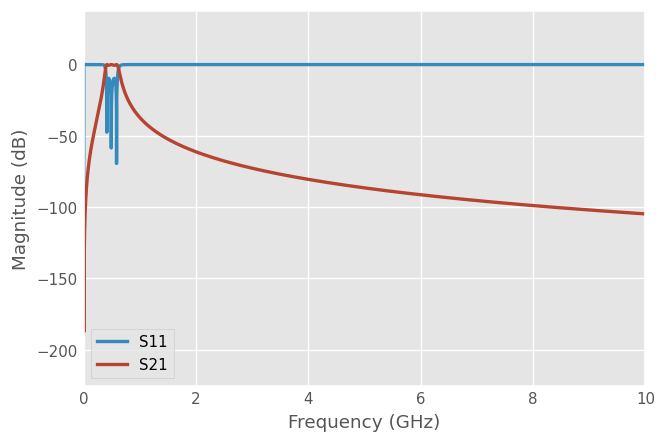

In [22]:
passband_manual.plot_s_db(m=0, n=0, lw=2)
passband_manual.plot_s_db(m=1, n=0, lw=2)

c) Projecte e simule o filtro usando uma implementação em microstrip coupled lines.



d) Faça uma implementação final do filtro e sua optimização usando uma
implementação em hairpin.



e) Faça a simulação electromagnética do layout do filtro e compare os resultados
obtidos.
Nota: Ver livros “Microwave Engineering”, David M. Pozar e “HF Filter Design and
Computer Simulation”, Randall W. Rhea.